Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting the chart
import matplotlib.patches as patches # add yellow rectangle
import pandas as pd # data manipulation
from matplotlib.patches import Rectangle

#### Data preparation

In [4]:
df_SIL = pd.read_csv("../Data/February.csv", dtype={7: str, 13: str}, low_memory=False)
monto_devengado = np.array(df_SIL['montoDevengado'])
monto_devengado = monto_devengado[monto_devengado > 1000000 ]

In [5]:
bins = [0,3000000,6000000,10000000,15000000,20000000,30000000, float('inf')]
labels = ['0-3M', '3M-6M', '6M-10M', '10M-15M', '15M-20M', '20M-30M', '30M+']
df_SIL['montoDevengado'] = pd.to_numeric(df_SIL['montoDevengado'], errors='coerce')
df_SIL['salary_range'] = pd.cut(df_SIL['montoDevengado'], bins=bins, labels=labels, right=False)
grouped = df_SIL.groupby('salary_range',observed=True).size().reset_index(name='count')


In [26]:
grouped

,salary_range,count
0,0-3M,54885
1,3M-6M,89320
2,6M-10M,95393
3,10M-15M,37160
4,15M-20M,7632
5,20M-30M,2106
6,30M+,504


**outputs**
- monto_devegado : Array of amount of money 

#### Plots

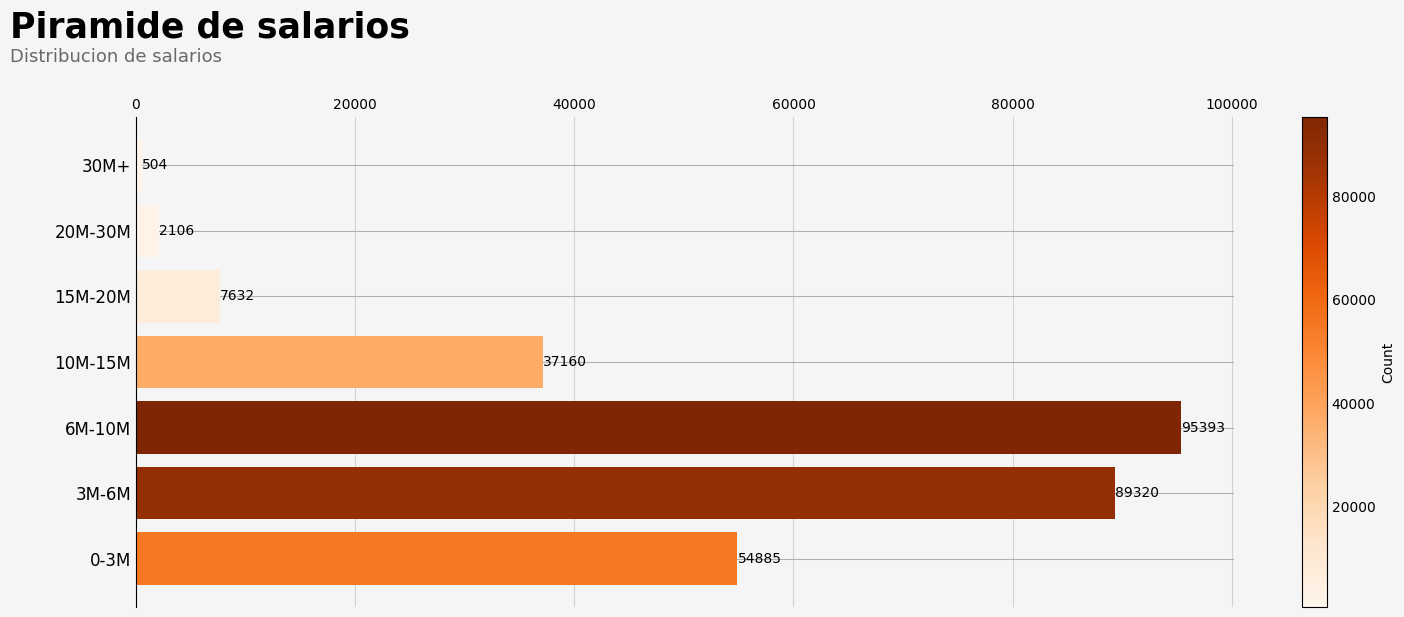

In [67]:
# DAY 1: PLOT FOR SALARY 
fig, ax = plt.subplots(figsize=(14, 5))

# Add grey background in the ax and fig
ax.set_facecolor('whitesmoke')
fig.set_facecolor('whitesmoke')

# Define colors to use for each bar
#colors = ['navy', 'steelblue', 'lightcoral', 'lightsalmon','orange', 'lightyellow']
norm = plt.Normalize(grouped['count'].min(), grouped['count'].max())
colors = plt.cm.Oranges(norm(grouped['count']))

# Create the plot
bars = ax.barh(grouped['salary_range'], grouped['count'],
        color=colors, # colors that we want
        zorder=2, # specify that the bars is drawn after the grid
       )
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             str(bar.get_width()), va='center', ha='left')
# Add a vertical grey line at the relative position
ax.grid(linestyle='-', # type of lines
        alpha=0.5, # opacity
        axis='x', # specify that we only want vertical lines
       )


title = 'Piramide de salarios'
fig.text(-0.08, 1.15, # relative postion
         title, 
         fontsize=25, # High font size for style
         fontweight = 'bold',
         ha='left', # align to the left
         family='dejavu sans'
        )


subtitle = 'Distribucion de salarios'
fig.text(-0.08, 1.10, # relative postion
         subtitle, 
         fontsize=13, # High font size for style
         color='dimgrey',
         ha='left', # align to the left
         family='dejavu sans'
        )


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)


ax.tick_params(axis='y', labelsize=12)
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Count')

ax.xaxis.tick_top()
plt.gcf().set_size_inches(14, 5) 
fig.savefig('../Charts/salary_pyramid/Piramide.png',bbox_inches = 'tight')

In [75]:
# DAY 2: TOP SALARY
df_unique = df_SIL.drop_duplicates(subset=['nombres', 'apellidos', 'montoPresupuestado', 'montoDevengado'])
top_salaries = df_unique.nlargest(10, 'montoDevengado')
top_salaries[['nombres','apellidos','tipoPersonal','descripcionEntidad','montoPresupuestado', 'montoDevengado']]


,nombres,apellidos,tipoPersonal,descripcionEntidad,montoPresupuestado,montoDevengado
39738,MARIO RAUL,CANO RICCIARDI,PER,004-MINISTERIO DE RELACIONES EXTERIORES,182219378,182219378
39496,RAUL ANTONIO,MONTIEL GASTO,PER,004-MINISTERIO DE RELACIONES EXTERIORES,143369402,143369402
39803,ENRIQUE,JARA OCAMPOS,PER,004-MINISTERIO DE RELACIONES EXTERIORES,141784434,141784434
39514,VICTOR HUGO RAMON,PANIAGUA FRETES,PER,004-MINISTERIO DE RELACIONES EXTERIORES,140841538,140841538
39435,ANTONIO,RIVAS PALACIOS,PER,004-MINISTERIO DE RELACIONES EXTERIORES,139273810,139273810
39788,PERLA BEATRIZ,GARCIA CRISTALDO,PER,004-MINISTERIO DE RELACIONES EXTERIORES,132634190,132634190
39628,JUAN FRANCISCO,FACETTI FERNANDEZ,PER,004-MINISTERIO DE RELACIONES EXTERIORES,128425418,128425418
39848,MARTHA SOPHIA,LOPEZ GARELLI,PER,004-MINISTERIO DE RELACIONES EXTERIORES,128355434,128355434
39509,JULIO CESAR,PERALTA RODAS,PER,004-MINISTERIO DE RELACIONES EXTERIORES,128257426,128257426
39839,BERNARDO JOSE,BALBUENA PRIETO,PER,004-MINISTERIO DE RELACIONES EXTERIORES,125583958,125583958


In [8]:
# DAY 3: top 3 salaries for each department
top_salaries = df_SIL.groupby('descripcionEntidad').apply(lambda x: x.nlargest(3, 'montoDevengado'),include_groups=False).reset_index(drop=True)
top_salaries

,Unnamed: 0,anio,mes,codigoNivel,descripcionNivel,codigoEntidad,codigoPersona,nombres,apellidos,sexo,discapacidad,tipoPersonal,lugar,montoPresupuestado,montoDevengado,salary_range
0,20,2024,2,11,11-PODER LEGISLATIVO,1,1219851,LIDUVINA MARIA,VERA DE ESPINOLA,F,N,PER,NaN,31304000,31304000,30M+
1,230,2024,2,11,11-PODER LEGISLATIVO,1,2615152,MAGIN RAMON,DUETTE ESTECHE,M,N,PER,NaN,31304000,31304000,30M+
2,861,2024,2,11,11-PODER LEGISLATIVO,1,346670,MARGARITA MARIA,MORSELLI DE CODAS,F,N,PER,NaN,30196270,30196270,30M+
3,258191,2024,2,14,14-CONTRALORÍA GENERAL DE LA REPÚBLICA,1,1338365,CAMILO DANIEL,BENITEZ ALDANA,M,N,PER,NaN,25927900,25927900,20M-30M
4,258270,2024,2,14,14-CONTRALORÍA GENERAL DE LA REPÚBLICA,1,1150004,AUGUSTO JOSE FELIX,PAIVA,M,N,PER,NaN,25927900,25927900,20M-30M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,262987,2024,2,23,23-ENTES AUTÓNOMOS Y AUTÁRQUICOS,38,2885497,CLEDIA ROXANA,ZAYAS DE CABAÑAS,F,N,PER,NaN,20411179,20411179,20M-30M
200,263138,2024,2,23,23-ENTES AUTÓNOMOS Y AUTÁRQUICOS,38,2885497,CLEDIA ROXANA,ZAYAS DE CABAÑAS,F,N,PER,NaN,20411179,20411179,20M-30M
201,263151,2024,2,23,23-ENTES AUTÓNOMOS Y AUTÁRQUICOS,39,1463846,JORGE MARCELO,KRONAWETTER KUIUMYIAN,M,N,PER,NaN,22423350,22423350,20M-30M
202,263593,2024,2,23,23-ENTES AUTÓNOMOS Y AUTÁRQUICOS,39,3197609,DERLIS GUSTAVO,AGUILAR FALCON,M,N,PER,NaN,19206790,19206790,15M-20M


In [14]:
# DAY 4: APELLIDOS IGUALES 
import pandas as pd
import networkx as nx



# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir nodos y relaciones
for _, row in df_SIL.iterrows():
    G.add_node(row['nombres'], apellido=row['apellidos'], entidad=row['descripcionEntidad'], salario=row['montoDevengado'])

# Función para encontrar familiares por apellido
def encontrar_familiares(grafo, persona):
    apellido = grafo.nodes[persona]['apellidos']
    
    familiares = []
    for nodo in grafo.nodes:
        if grafo.nodes[nodo]['apellidos'] == apellido:
            familiares.append({
                'nombre': nodo,
                'apellido': grafo.nodes[nodo]['apellidos'],
                'entidad': grafo.nodes[nodo]['descripcionEntidad'],
                'salario': grafo.nodes[nodo]['montoDevengado']
            })
    
    return familiares

# Encontrar familiares para cada persona en el DataFrame
todas_coincidencias = {persona: encontrar_familiares(G, persona) for persona in G.nodes}

# Imprimir las coincidencias
for persona, familia in todas_coincidencias.items():
    print(f"{persona}: {familia}")



KeyError: 'apellidos'

In [20]:
G.number_of_edges()

0

In [9]:
import pandas as pd

# Convertir el diccionario de coincidencias a un DataFrame
coincidencias_list = []
for persona, familia in todas_coincidencias.items():
    for miembro in familia:
        coincidencias_list.append({
            'persona': persona,
            'nombre': miembro['nombre'],
            'apellido': miembro['apellido'],
            'entidad': miembro['entidad'],
            'salario': miembro['salario']
        })

coincidencias_df = pd.DataFrame(coincidencias_list)

# Guardar en un archivo CSV
coincidencias_df.to_csv('coincidencias.csv', index=False)

,Unnamed: 0,anio,mes,codigoNivel,descripcionNivel,codigoEntidad,descripcionEntidad,codigoPersona,nombres,apellidos,sexo,discapacidad,tipoPersonal,lugar,montoPresupuestado,montoDevengado,salary_range
0,0,2024,2,11,11-PODER LEGISLATIVO,1,001-CONGRESO NACIONAL,1760027,LUIS ALBERTO,ALVARENGA RIOS,M,N,COM,003-MINISTERIO DEL INTERIOR,1200000,1200000,0-3M
1,1,2024,2,11,11-PODER LEGISLATIVO,1,001-CONGRESO NACIONAL,3481889,ALFREDO DAMIAN,MORINIGO FRETEZ,M,N,PER,NaN,6000000,6000000,6M-10M
2,2,2024,2,11,11-PODER LEGISLATIVO,1,001-CONGRESO NACIONAL,4765446,MELIZA GABRIELA,REDONDO RAMIREZ,F,N,CON,NaN,2750000,2750000,0-3M
3,3,2024,2,11,11-PODER LEGISLATIVO,1,001-CONGRESO NACIONAL,3761820,MARIAM YUDITH,PERALTA ALMIRON,F,N,PER,NaN,9100000,9100000,6M-10M
4,4,2024,2,11,11-PODER LEGISLATIVO,1,001-CONGRESO NACIONAL,3518931,EDUARDO,MARTINEZ DAVALOS,M,N,PER,NaN,4000000,4000000,3M-6M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286995,286995,2024,2,28,28-UNIVERSIDADES NACIONALES,8,008-UNIVERSIDAD NACIONAL DE CANINDEYÚ,3554029,ANA ELIZABETH,COLMAN RIVEROS,F,N,PER,NaN,7945640,7945640,6M-10M
286996,286996,2024,2,28,28-UNIVERSIDADES NACIONALES,8,008-UNIVERSIDAD NACIONAL DE CANINDEYÚ,4010012,DANIELA ADRIANA,NUÑEZ,F,N,PER,NaN,1048047,1048047,0-3M
286997,286997,2024,2,28,28-UNIVERSIDADES NACIONALES,8,008-UNIVERSIDAD NACIONAL DE CANINDEYÚ,2307286,MARIA YSABEL,DAVALOS ARRUA,F,N,PER,NaN,3222680,3222680,3M-6M
286998,286998,2024,2,28,28-UNIVERSIDADES NACIONALES,8,008-UNIVERSIDAD NACIONAL DE CANINDEYÚ,4372155,CYNTHIA ELIZABETH,BENEGA MOREL,F,N,PER,NaN,6445360,6445360,6M-10M
